In [1]:
#pip install praw pandas

# Importing packages and Authorising Reddit credentials

In [2]:
import praw
import pandas as pd
import datetime as dt

# Entring reddit credentials

user_agent = "Reddit_Scrapper 1.0 by /u/Similar_Annual7584"
reddit = praw.Reddit(
    client_id="YXF5BKUD0AKVEOgtVk5z1A",
    
    client_secret="2JyljUUhgT6ztr_O1vQh8XHQ28jqMg",
    
    user_agent=user_agent
)

subreddit_name = 'hurricane'
post_limit = 100  # Adjust the limit as needed

# Fetching the posts from the subreddit
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.hot(limit=post_limit)  # You can use .new(), .top() etc. instead of .hot()

# Storing the data in a list of dictionaries
posts_data = []
for post in posts:
    posts_data.append({
        'title': post.title,
        'score': post.score,
        'id': post.id,
        'url': post.url,
        'comms_num': post.num_comments,
        'created': post.created,
        'body': post.selftext
    })

# Converting the list of dictionaries to a Pandas DataFrame
posts_df = pd.DataFrame(posts_data)

# Converting the 'created' column to a datetime format
posts_df['created'] = posts_df['created'].apply(lambda x: dt.datetime.fromtimestamp(x))

# Save the DataFrame to a CSV file
posts_df.to_csv('hurricane_posts.csv', index=False)

print("Data has been saved to hurricane_posts.csv")

# Displaying the first few rows of the DataFrame
print(posts_df.head())

C:\Users\seerl\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\seerl\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Data has been saved to hurricane_posts.csv
                                               title  score       id  \
0                                      New moderator    144   oftgr0   
1                                      June 15th GFS      8  1daqcy5   
2  "This will be one of the most active hurricane...    193  1d92nv3   
3                                     Miami 6/29-7/3      0  1d95tvf   
4                                            A book       6  1d8bh6b   

                                                 url  comms_num  \
0  https://www.reddit.com/r/hurricane/comments/of...         22   
1                          https://imgur.com/XVZ5Yac          5   
2                https://i.redd.it/7ozsjxkawt4d1.png        155   
3  https://www.reddit.com/r/hurricane/comments/1d...          3   
4  https://www.reddit.com/r/hurricane/comments/1d...          2   

              created                                               body  
0 2021-07-07 18:15:53  I’m now officially a ne

# Posts per month analysis 

month
2021-07     1
2024-01    13
2024-02    20
2024-03    19
2024-04    13
2024-05    26
2024-06     8
Freq: M, dtype: int64


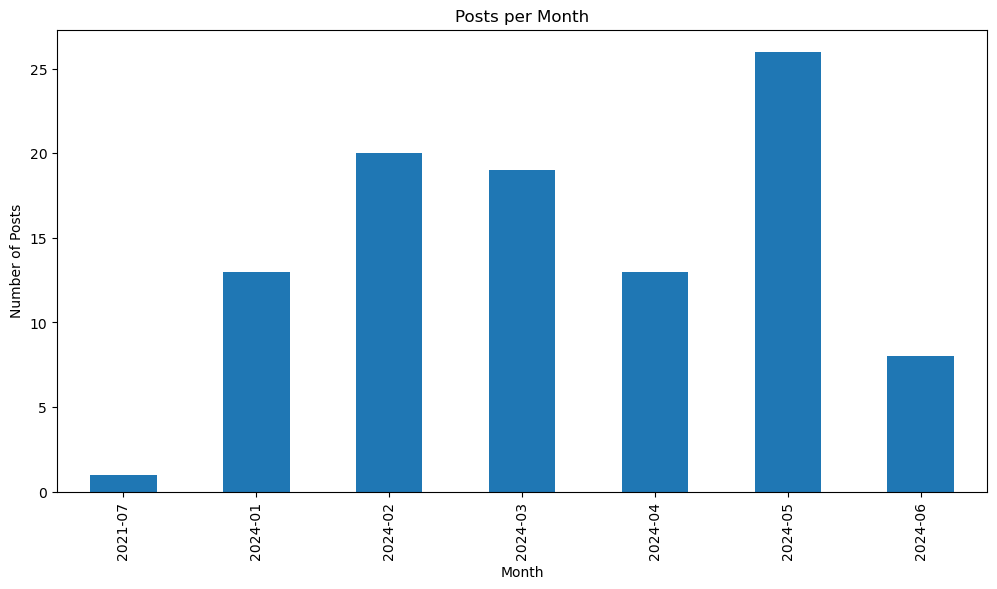

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('hurricane_posts.csv')

# Counting posts per month
df['created'] = pd.to_datetime(df['created'])
df['month'] = df['created'].dt.to_period('M')

posts_per_month = df.groupby('month').size()
print(posts_per_month)

# Plotting
import matplotlib.pyplot as plt

posts_per_month.plot(kind='bar', figsize=(12, 6), title='Posts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()


# Fetching major US cities

In [4]:
import requests
# Fetching list of major US cities from an open data repository
response = requests.get('https://simplemaps.com/static/data/us-cities/uscitiesv1.5.csv')
with open('uscities.csv', 'wb') as file:
    file.write(response.content)

In [5]:
# Load the city data into a DataFrame
cities_df = pd.read_csv('uscities.csv')
cities = cities_df['city'].unique()
print(cities)

['Prairie Ridge' 'Edison' 'Packwood' ... 'Little Eagle' 'Timber Lake'
 'Goodwill']


In [6]:
# Define the subreddit and the number of posts to scrape per city
subreddit_name = 'hurricane'
post_limit = 100

# Function to fetch hurricane data for given city

In [7]:
# Function to fetch and analyze posts for a given city
def fetch_city_data(city):
    subreddit = reddit.subreddit(subreddit_name)
    query = city + " hurricane"
    posts = subreddit.search(query, limit=post_limit)
    
    city_data = []
    for post in posts:
        city_data.append({
            'city': city,
            'title': post.title,
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'comms_num': post.num_comments,
            'created': post.created,
            'body': post.selftext
        })
    return city_data

# Selecting top 100 cities

In [8]:
# Selecting the top 100 cities by population
top_100_cities = cities_df.nlargest(100, 'population')['city'].unique()

In [9]:
from joblib import Parallel, delayed
# Use parallel processing to fetch data for all cities
all_data = Parallel(n_jobs=-1)(delayed(fetch_city_data)(city) for city in top_100_cities)
all_data = [item for sublist in all_data for item in sublist]  # Flatten the list

# Converting fetched data to pandas dataframe

In [10]:
# Converting the list of dictionaries to a Pandas DataFrame
posts_df = pd.DataFrame(all_data)

In [11]:
# Converting the 'created' column to a datetime format
posts_df['created'] = posts_df['created'].apply(lambda x: dt.datetime.fromtimestamp(x))

# Saving the dataframe to a csv file

In [12]:
# Save the DataFrame to a CSV file
posts_df.to_csv('hurricane_cities_posts.csv', index=False)

# Displaying the first few rows of the DataFrame
print(posts_df.head())

       city                                              title  score  \
0  New York         I invented a new kind of hurricane shutter     35   
1  New York                                  New to Hurricanes      9   
2  New York  Hurricane Sandy. The 6th costliest hurricane i...     47   
3  New York          New in a Hurricane Área what to prep for?      7   
4  New York  The Hurricane Hunter Satellites - Providing ne...     11   

        id                                                url  comms_num  \
0  1cz7wus             https://www.reddit.com/gallery/1cz7wus         11   
1  14ee8gr  https://www.reddit.com/r/hurricane/comments/14...         28   
2   xv02qv                https://i.redd.it/5ysv4cj4nor91.jpg          8   
3  13n3d4c  https://www.reddit.com/r/hurricane/comments/13...         38   
4  14pl6jn  https://www.drewexmachina.com/2022/05/15/the-h...          0   

              created                                               body  
0 2024-05-23 20:19:39  Just g

# Function to calculate proneness of given city

In [13]:
# Function to calculate proneness score with weighted factors
def calculate_proneness_score(city):
    city_posts = posts_df[posts_df['city'] == city]
    post_count = len(city_posts)
    total_comments = city_posts['comms_num'].sum()
    total_score = city_posts['score'].sum()
    
    # Weighted heuristic for proneness score
    score = (0.5 * post_count / post_limit) + (0.3 * total_comments / (post_limit * 10)) + (0.2 * total_score / (post_limit * 10))
    return score

# Calculating proneness of top 100 cities

In [14]:
proneness_scores = {city: calculate_proneness_score(city) for city in top_100_cities}
print(proneness_scores)

{'New York': 1.1580000000000001, 'Los Angeles': 0.07100000000000001, 'Chicago': 0.0, 'Miami': 0.8973, 'Dallas': 0.0094, 'Philadelphia': 0.0072, 'Houston': 0.08499999999999999, 'Washington': 0.0141, 'Atlanta': 0.0868, 'Boston': 0.0064, 'Phoenix': 0.0092, 'Seattle': 0.006, 'San Francisco': 0.09259999999999999, 'Detroit': 0.0, 'San Diego': 0.1152, 'Minneapolis': 0.006500000000000001, 'Tampa': 0.36160000000000003, 'Denver': 0.0, 'Brooklyn': 0.0, 'Queens': 0.0058000000000000005, 'Baltimore': 0.011300000000000001, 'Riverside': 0.0, 'Saint Louis': 0.0567, 'Las Vegas': 0.0242, 'Portland': 0.0, 'San Antonio': 0.09319999999999999, 'Sacramento': 0.0, 'San Jose': 0.12310000000000001, 'Orlando': 0.29150000000000004, 'Cleveland': 0.0, 'Pittsburgh': 0.0054, 'Cincinnati': 0.0083, 'Manhattan': 0.0, 'Austin': 0.0, 'Kansas City': 0.4416, 'Indianapolis': 0.0057, 'Columbus': 0.0, 'Virginia Beach': 0.6166, 'Charlotte': 0.0708, 'Bronx': 0.0, 'Milwaukee': 0.0, 'Providence': 0.2249, 'Jacksonville': 0.1575, 'Sa

# Normalizing the proneness values within the range of 1 to 10

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the scores to fit within the range 1 to 10
scaler = MinMaxScaler(feature_range=(1, 10))
scores_list = list(proneness_scores.values())
normalized_scores = scaler.fit_transform(pd.DataFrame(scores_list))

# Updating the proneness scores with normalized values
proneness_scores = {city: round(score[0], 2) for city, score in zip(proneness_scores.keys(), normalized_scores)}

# Converting scores to dataframe

In [16]:
# Converting the scores to a DataFrame for easy analysis and visualization
scores_df = pd.DataFrame(list(proneness_scores.items()), columns=['City', 'Proneness Score'])
scores_df = scores_df.sort_values(by='Proneness Score', ascending=False)

# Printing the proneness scores of top 10 cities

In [17]:
# Displaying the top 10 cities
print(scores_df.head(10))

              City  Proneness Score
47     New Orleans            10.00
80       New Haven             9.86
0         New York             9.79
3            Miami             7.81
92      Long Beach             7.69
54      Fort Worth             7.13
37  Virginia Beach             5.68
86        Palm Bay             4.46
34     Kansas City             4.35
50   Oklahoma City             4.31


# Bar graph plotting top 20 cities

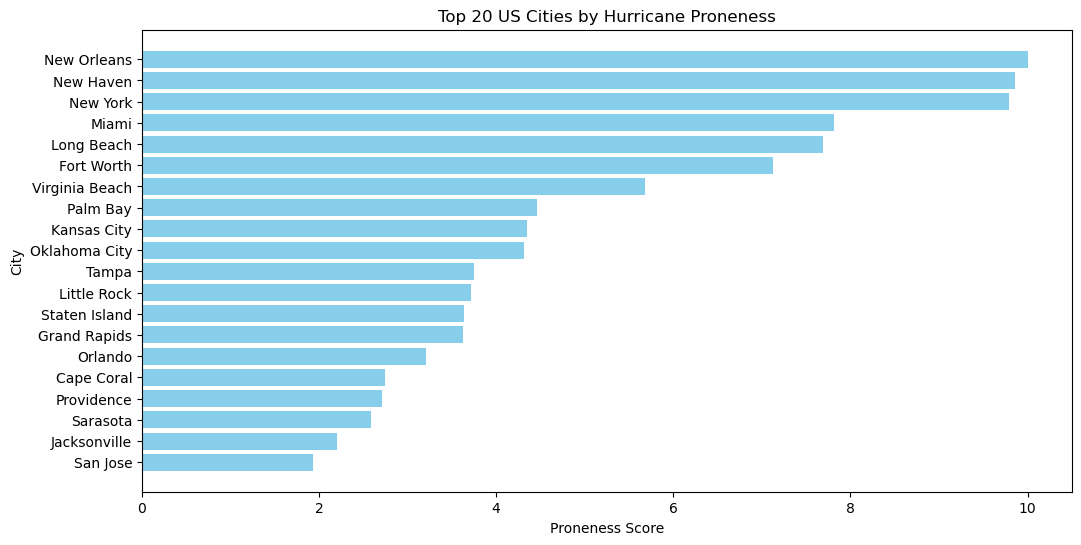

In [18]:
# Ploting the top 20 cities by proneness score
top_cities = scores_df.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_cities['City'], top_cities['Proneness Score'], color='skyblue')
plt.xlabel('Proneness Score')
plt.ylabel('City')
plt.title('Top 20 US Cities by Hurricane Proneness')
plt.gca().invert_yaxis()
plt.show()

# Generating the Word Cloud

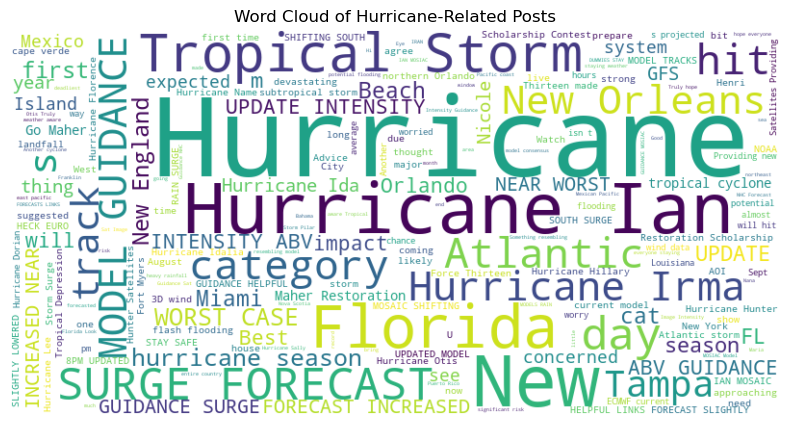

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# Generate and plot the word cloud
text = ' '.join(posts_df['title'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hurricane-Related Posts')
plt.show()

# Generating a Heat Map

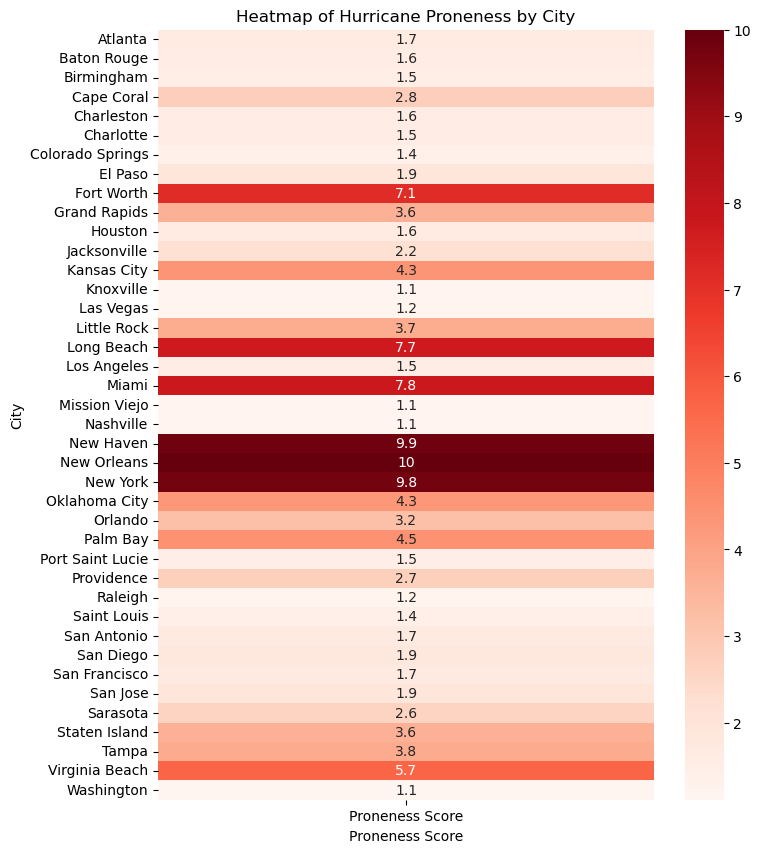

In [23]:
# Creating a heatmap of proneness scores
top_20_cities = scores_df.head(40)
heatmap_data = top_20_cities.pivot_table(index='City', values='Proneness Score', aggfunc='mean')
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', cbar=True)

#sns.heatmap(heatmap_data, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")

plt.title('Heatmap of Hurricane Proneness by City')
plt.xlabel('Proneness Score')
plt.show()